<a href="https://colab.research.google.com/github/pjcroxas/Data-Science-Experiments/blob/master/Propensity_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Propensity Modeling of Customer Purchasing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dir = "/content/drive/My Drive/Data Science Portfolio/2023/Applied/data/propensity"
ui_df_train = pd.read_csv(dir+"/training_sample.csv", sep=",")
ui_df_test = pd.read_csv(dir+"/testing_sample.csv", sep=",")
ui_df_train.sample(3)

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
387628,91ea-27115cb7-91ea-b1d3-ad3d-301916,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
243212,d117-7d79b0d6-d117-4792-b216-676717,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
197665,7b59-8d723838-7b59-4784-99c8-723144,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


## EDA

In [3]:
ui_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

In [10]:
ui_df_train.describe()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
count,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,...,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000
mean,0.099150,0.074521,0.112916,0.036849,0.026735,0.003570,0.016208,0.003511,0.230362,0.017277,...,0.000389,0.005542,0.001096,0.290024,0.680706,0.194220,0.128364,0.534915,0.933224,0.041926
std,0.298864,0.262617,0.316490,0.188391,0.161307,0.059647,0.126274,0.059151,0.421065,0.130302,...,0.019711,0.074241,0.033084,0.453773,0.466204,0.395599,0.334495,0.498780,0.249634,0.200420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='basket_icon_click', ylabel='count'>

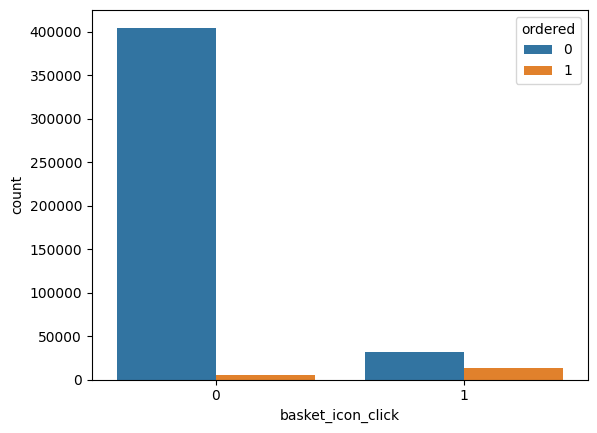

In [5]:
sns.countplot(ui_df_train, x="basket_icon_click", hue="ordered")

<Axes: xlabel='basket_add_list', ylabel='count'>

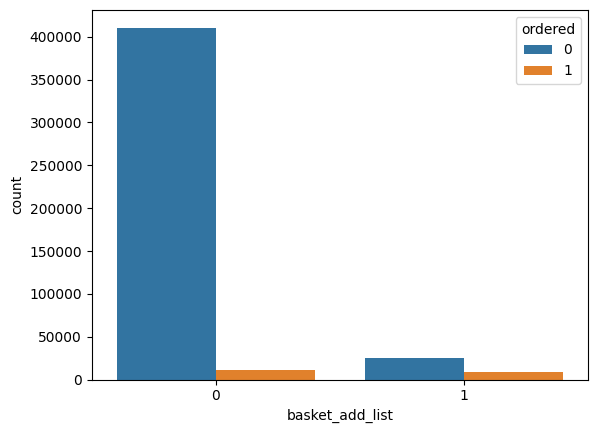

In [7]:
sns.countplot(ui_df_train, x="basket_add_list", hue="ordered")

<Axes: xlabel='basket_add_detail', ylabel='count'>

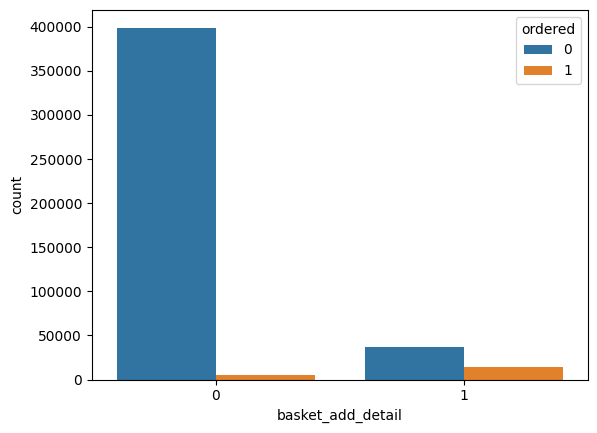

In [8]:
sns.countplot(ui_df_train, x="basket_add_detail", hue="ordered")

In [12]:
ui_df_train.columns

Index(['UserID', 'basket_icon_click', 'basket_add_list', 'basket_add_detail',
       'sort_by', 'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_mobile', 'device_computer', 'device_tablet',
       'returning_user', 'loc_uk', 'ordered'],
      dtype='object')

## Correlation Analysis

<Axes: >

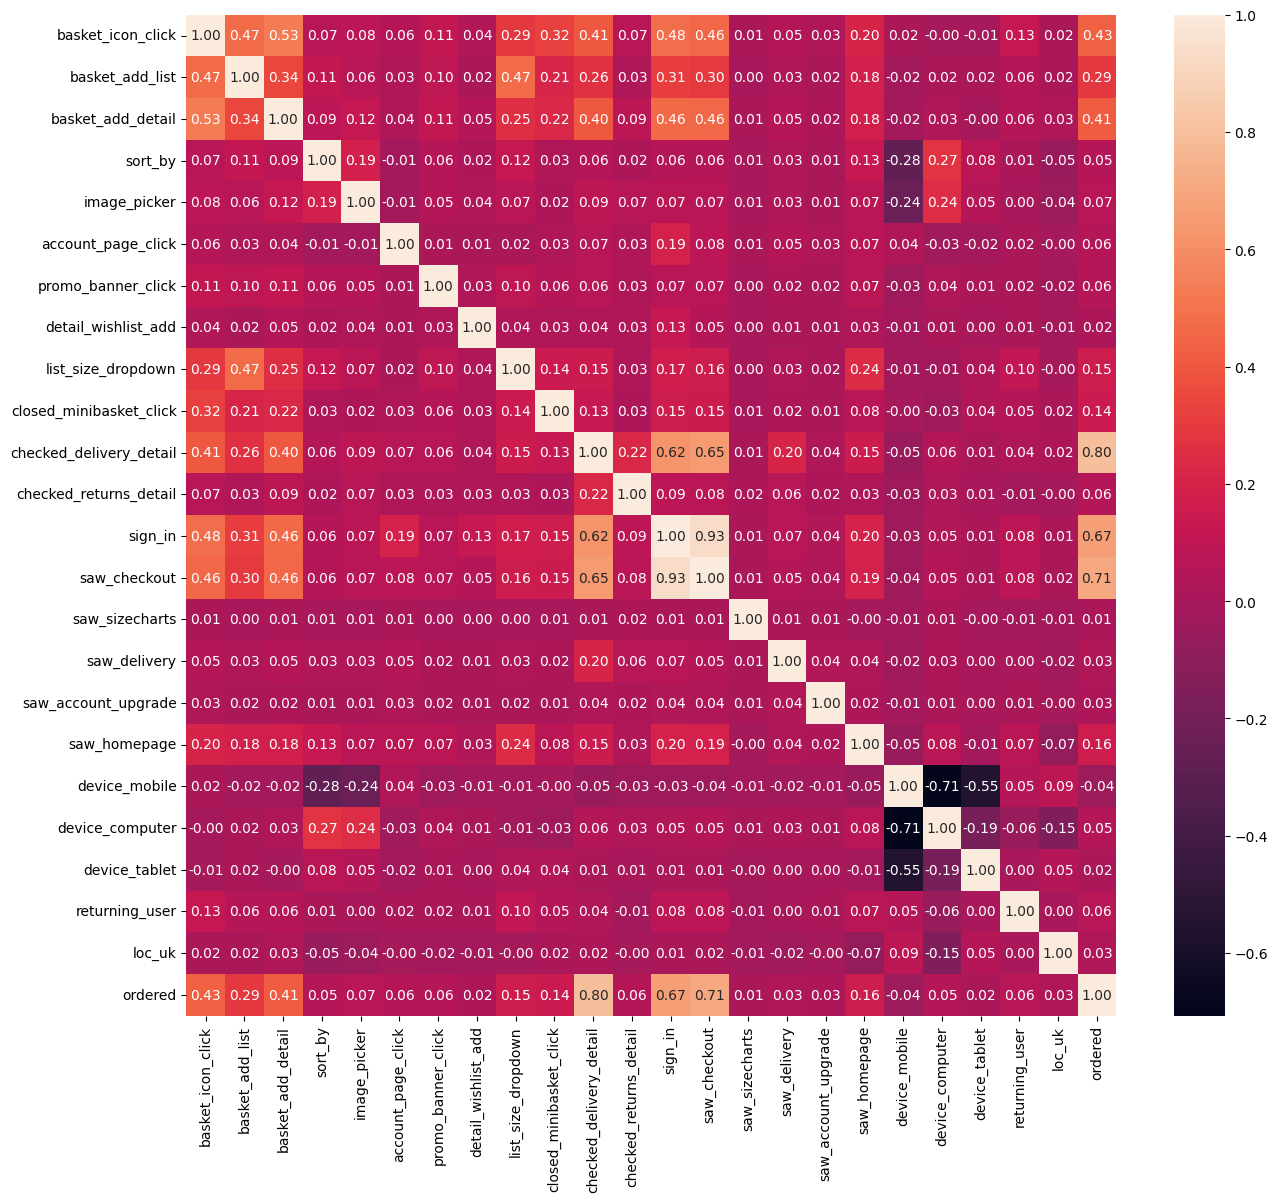

In [19]:
num_columns = ui_df_train.drop("UserID", axis=1)
plt.figure(figsize=(15, 13))
sns.heatmap(num_columns.corr(),
            fmt=".2f",
            annot=True)

<Axes: >

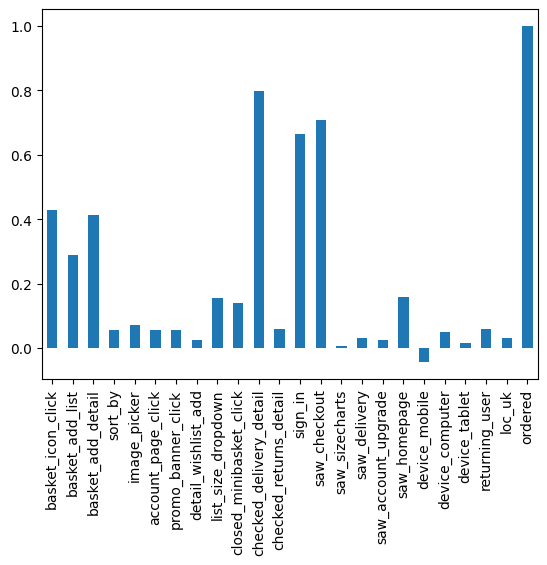

In [22]:
num_columns.corr()["ordered"].plot(kind="bar")

1. There is high correlation between users who ordered and users that checked delivery detail, and saw checkout.
2. There is substantial correlation between users who ordered and users that sign-in. However, it is important to know that in order to add to cart and checkout, users should be logged in.
3. Also, for users that clicks basket icon and add basket detail.

## Mutual Information Scoring

In [23]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    plt.figure(figsize=(15, 5))
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

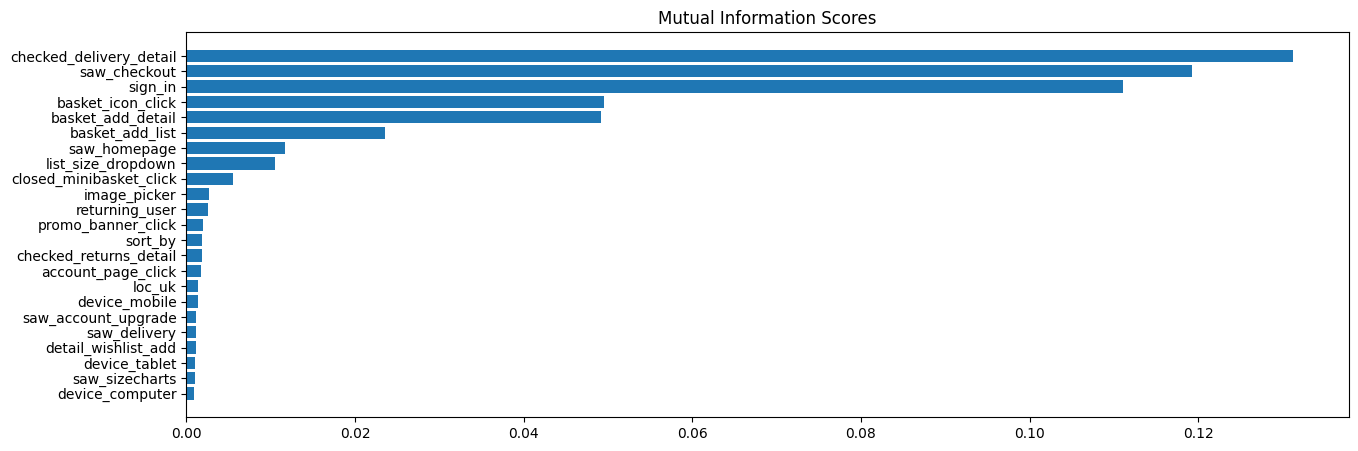

In [24]:
Y = num_columns["ordered"]
X = num_columns.drop("ordered", axis=1)
mi_scores = make_mi_scores(X, Y)
plot_mi_scores(mi_scores)

In [28]:
mi_scores

checked_delivery_detail    0.131289
saw_checkout               0.119242
sign_in                    0.111044
basket_icon_click          0.049475
basket_add_detail          0.049156
basket_add_list            0.023531
saw_homepage               0.011684
list_size_dropdown         0.010568
closed_minibasket_click    0.005496
image_picker               0.002730
returning_user             0.002542
promo_banner_click         0.001972
sort_by                    0.001902
checked_returns_detail     0.001797
account_page_click         0.001687
loc_uk                     0.001403
device_mobile              0.001386
saw_account_upgrade        0.001177
saw_delivery               0.001164
detail_wishlist_add        0.001119
device_tablet              0.001059
saw_sizecharts             0.001022
device_computer            0.000936
Name: MI Scores, dtype: float64

## Propensity Model

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
log_classifier = LogisticRegression()
gauss_classifier = GaussianNB()

In [53]:
ui_df_train.columns

Index(['UserID', 'basket_icon_click', 'basket_add_list', 'basket_add_detail',
       'sort_by', 'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_mobile', 'device_computer', 'device_tablet',
       'returning_user', 'loc_uk', 'ordered'],
      dtype='object')

## Prepare Data

In [69]:
customer_ui_df = pd.concat([ui_df_train, ui_df_test], axis=0)
X = customer_ui_df.drop(["ordered", "UserID", "device_mobile", "device_computer"], axis=1)
y = customer_ui_df["ordered"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Logistic Regression

In [70]:
log_classifier.fit(X_train, y_train)

LogisticRegression()

In [71]:
predict_order = log_classifier.predict(X_test)

In [75]:
print(confusion_matrix(y_test, predict_order))

[[175324   1121]
 [   134   5538]]


In [78]:
print(classification_report(y_test, predict_order))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    176445
           1       0.83      0.98      0.90      5672

    accuracy                           0.99    182117
   macro avg       0.92      0.99      0.95    182117
weighted avg       0.99      0.99      0.99    182117



## Gaussian Naive Bayes

In [79]:
gauss_classifier.fit(X_train, y_train)

GaussianNB()

In [80]:
predict_order_gnb = gauss_classifier.predict(X_test)

In [81]:
print(confusion_matrix(y_test, predict_order_gnb))

[[174397   2048]
 [    72   5600]]


In [82]:
print(classification_report(y_test, predict_order))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    176445
           1       0.83      0.98      0.90      5672

    accuracy                           0.99    182117
   macro avg       0.92      0.99      0.95    182117
weighted avg       0.99      0.99      0.99    182117

